# E3 - ARIMA

Elaborado por GRUPO 1:
- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

In [31]:
# Librerias y funciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

## 3.1. Análisis AFC y PAFC de 4 Series

In [30]:
series = pd.read_csv('DataSet/data_arma.csv', header=0, index_col=0)
series.describe()

,ts1,ts2,ts3,ts4
count,500.000000,500.000000,500.000000,500.000000
mean,-0.009962,0.104446,-0.031936,-0.013467
std,1.095166,2.242134,1.884763,1.013414
min,-3.577476,-6.880294,-5.760386,-3.022557
25%,-0.745666,-1.498428,-1.333192,-0.723487
50%,-0.041335,0.083156,0.135272,0.012143
75%,0.720957,1.835505,1.271606,0.693693
max,3.492215,6.297951,5.604490,2.960854


In [32]:
warnings.filterwarnings('ignore')

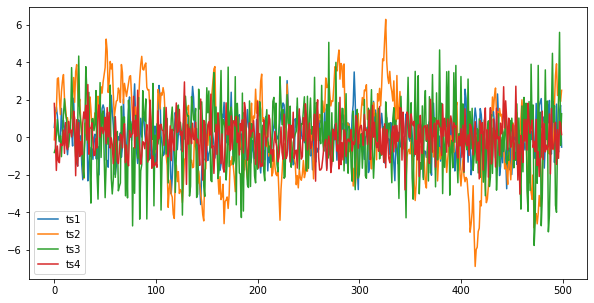

In [33]:
series.plot(figsize=(10, 5))

## TS1

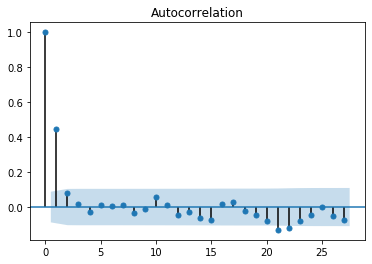

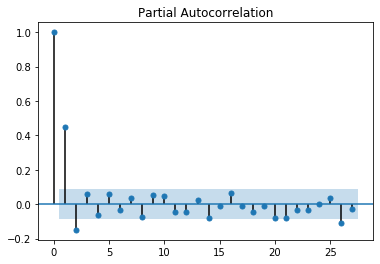

In [34]:
#ACF y PACF serie ts1
plot_acf(series.ts1);
plot_pacf(series.ts1);

* Análisis ts1

La serie de datos ts1 de acuerdo con el autocorrelation plot permite evidenciar que la serie de de datos es de Media Móvil, presentando un cambio abrupto después de la segunda observación, q=2

## TS2

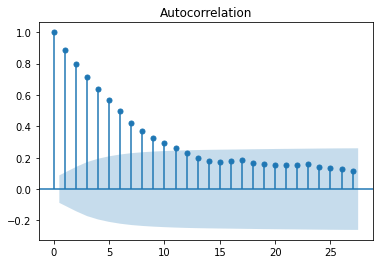

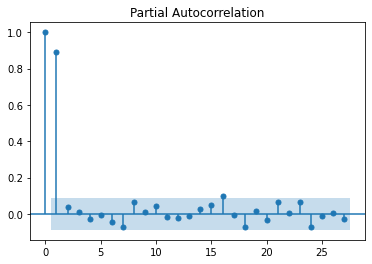

In [25]:
#ACF y PACF serie ts2
plot_acf(series.ts2);
plot_pacf(series.ts2);

* Análisis ts2

De acuerdo con el autocorrelation plot de la ts2 se puede evidenciar que la serie de de datos es Autorregresiva, acorde con esto se presenta en el partial correlation plot  que es de grado 2.

## TS3

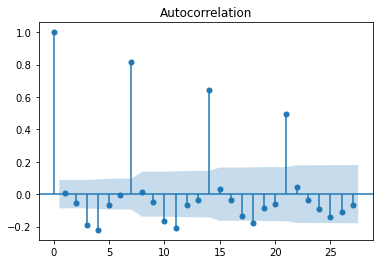

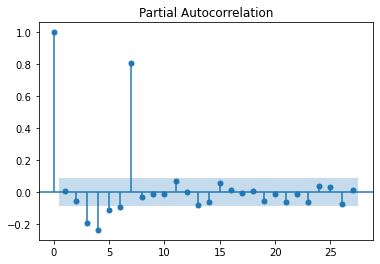

In [26]:
#ACF y PACF serie ts3
plot_acf(series.ts3);
plot_pacf(series.ts3);

* Análisis ts3

El autocorrelation plot de esta serie de datos, da indicios de diferenciación 

## TS4

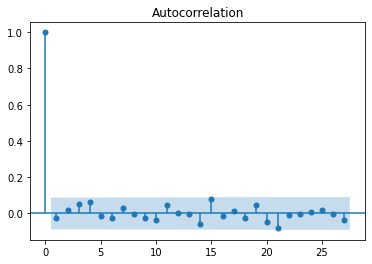

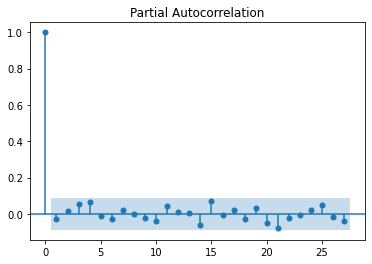

In [27]:
#ACF y PACF serie ts4
plot_acf(series.ts4);
plot_pacf(series.ts4);

* Análisis ts4

## 3.2. Análisis serie "Ventas de Shampoo"

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


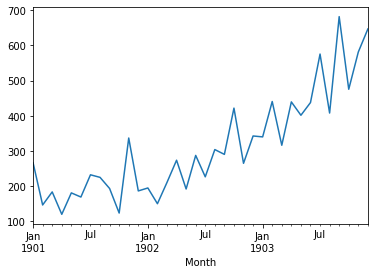

In [37]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
shampoo = pd.read_csv('DataSet/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(shampoo.head())
shampoo.plot(figsize=(6, 4));

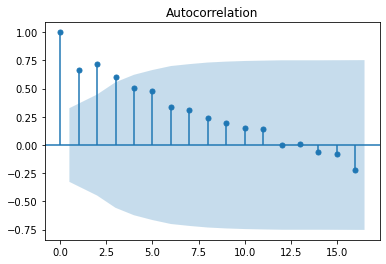

In [29]:
#Función de Autocorrelación
plot_acf(shampoo);

La ACF sugiere una diferenciación.

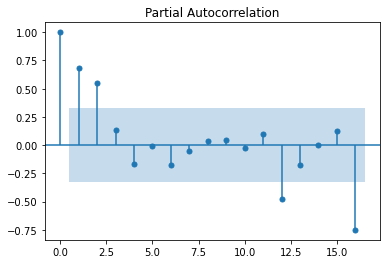

In [30]:
#Función de Autocorrelación Parcial
plot_pacf(shampoo);

La PACF sugiere un autorregresivo de orden 3.

In [31]:
#Bases de train y test
X = shampoo.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

### a. Modelo ARIMA(3,1,0)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   22
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -121.992
Method:                       css-mle   S.D. of innovations             59.934
Date:                Sat, 10 Jul 2021   AIC                            253.983
Time:                        19:06:41   BIC                            259.439
Sample:                             1   HQIC                           255.269
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8087      4.738      1.437      0.151      -2.477      16.094
ar.L1.D.y     -0.9051      0.205     -4.414      0.000      -1.307      -0.503
ar.L2.D.y     -0.5221      0.269     -1.942      0.0

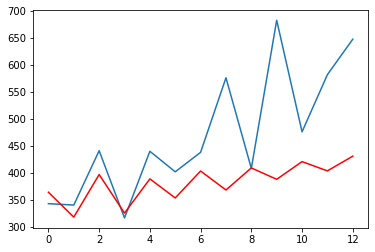

In [38]:
# fit model
model1 = ARIMA(history, order=(3,1,0))
model1_fit = model1.fit(disp=0)
print(model1_fit.summary())

output = model1_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

#print(pd.DataFrame({'predict':predictions, 'real':real_values}))

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


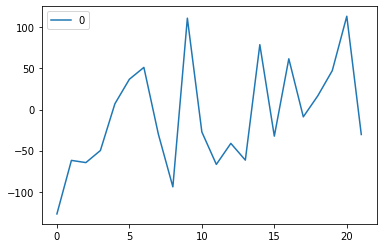

In [33]:
# plot residual errors
residuals = pd.DataFrame(model1_fit.resid)
residuals.plot()
plt.show()

In [34]:
# MSE
mse1 = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse1)

Test MSE: 16994.713


### b. Modelo ARIMA(3,1,1)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   22
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -121.517
Method:                       css-mle   S.D. of innovations             58.322
Date:                Sat, 10 Jul 2021   AIC                            255.033
Time:                        19:06:45   BIC                            261.580
Sample:                             1   HQIC                           256.576
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0137      3.399      2.063      0.039       0.352      13.676
ar.L1.D.y     -0.5688      0.399     -1.426      0.154      -1.351       0.213
ar.L2.D.y     -0.2719      0.391     -0.696      0.4

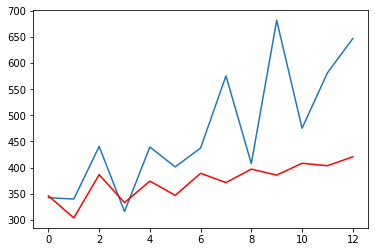

In [39]:
# fit model
model2 = ARIMA(history, order=(3,1,1))
model2_fit = model2.fit(disp=0)
print(model2_fit.summary())

output = model2_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

#print(pd.DataFrame({'predict':predictions, 'real':real_values}))

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


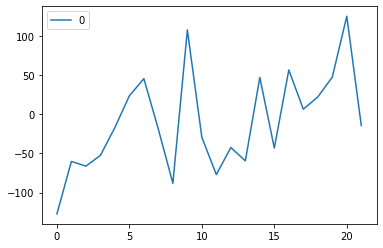

In [36]:
# plot residual errors
residuals = pd.DataFrame(model2_fit.resid)
residuals.plot()
plt.show()

In [37]:
# MSE
mse2 = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse2)

Test MSE: 17779.501


### c. Modelo ARIMA(3,1,2)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   22
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -119.530
Method:                       css-mle   S.D. of innovations             47.916
Date:                Sat, 10 Jul 2021   AIC                            253.059
Time:                        19:06:50   BIC                            260.696
Sample:                             1   HQIC                           254.858
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3326      4.404      1.665      0.096      -1.299      15.964
ar.L1.D.y     -0.2412      0.178     -1.354      0.176      -0.590       0.108
ar.L2.D.y     -0.4758      0.140     -3.394      0.0

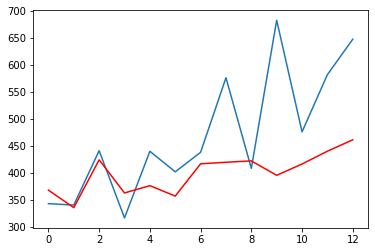

In [40]:
# fit model
model3 = ARIMA(history, order=(3,1,2))
model3_fit = model3.fit(disp=0)
print(model3_fit.summary())

output = model3_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

#print(pd.DataFrame({'predict':predictions, 'real':real_values}))

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

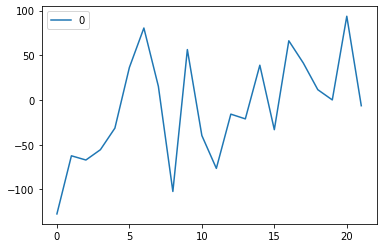

In [39]:
# plot residual errors
residuals = pd.DataFrame(model3_fit.resid)
residuals.plot()
plt.show()

In [40]:
# MSE
mse3 = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse3)

Test MSE: 13474.279


### d. Modelo ARIMA(3,1,3)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   22
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -119.450
Method:                       css-mle   S.D. of innovations             47.772
Date:                Sat, 10 Jul 2021   AIC                            254.899
Time:                        19:07:17   BIC                            263.628
Sample:                             1   HQIC                           256.956
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4366      3.922      1.896      0.058      -0.250      15.124
ar.L1.D.y     -0.1547      0.277     -0.558      0.577      -0.698       0.389
ar.L2.D.y     -0.5236      0.172     -3.038      0.0

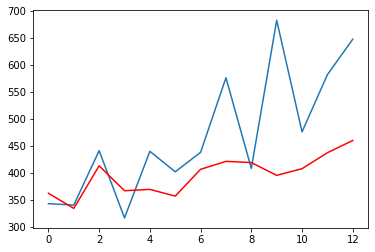

In [41]:
# fit model
model4 = ARIMA(history, order=(3,1,3))
model4_fit = model4.fit(disp=0)
print(model4_fit.summary())

output = model4_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

#print(pd.DataFrame({'predict':predictions, 'real':real_values}))

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

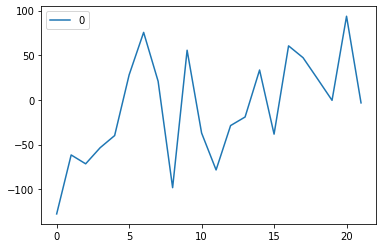

In [42]:
# plot residual errors
residuals = pd.DataFrame(model4_fit.resid)
residuals.plot()
plt.show()

In [44]:
# MSE
mse4 = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse4)

Test MSE: 13776.452


In [45]:
# Comparación de MSE
from tabulate import tabulate
table = [['Modelo', 'MSE'], ['ARIMA (3,1,0)', mse1], ['ARIMA (3,1,1)', mse2], ['ARIMA (3,1,2)', mse3],['ARIMA (3,1,3)', mse4]]
print(tabulate(table))

-------------  ------------------
Modelo         MSE
ARIMA (3,1,0)  16994.747115129765
ARIMA (3,1,1)  17779.51265171074
ARIMA (3,1,2)  13474.296542665055
ARIMA (3,1,3)  13776.451814434831
-------------  ------------------


# Conclusión

De acuerdo con el MSE de los diferentes modelos, el que mejor se ajusta el ARIMA de parámentros (3,1,2) con un MSE de 13472.3